In [2]:
import numpy as np
import import_ipynb
from chapter1 import solveUpper, solveLower
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)
plt.rc("axes", edgecolor="white")
plt.rc("legend", frameon=True, framealpha=0.8, facecolor="white", edgecolor="white")

# 3 Interpolation
## Polynomial Interpolation
### Lagrange Polynomial via Neville's Algorithm

In [2]:
def NevilleAlgorithm(t, x, y):
    n = len(x)
    p = y.copy()
    for i in reversed(range(n)):
        for j in range(i):
            p[j] = ((t - x[j]) * p[j+1] - (t - x[j+n-i]) * p[j]) / (x[j+n-i] - x[j])
    return p[0]

def LagrangePolynomial(x, y):
    def P(t):
        return NevilleAlgorithm(t, x, y)
    return P

### Newton Polynomial via Horner's Method

In [42]:
def dividedDifferences(x, y):
    n = len(x)
    coeffs = y.copy()
    for k in range(1,n):
        for i in reversed(range(k,n)):
            coeffs[i] = (coeffs[i] - coeffs[i-1]) / (x[i] - x[i-k])
    return coeffs

def HornerMethod(t, coeffs, x):
    p = 0
    for c, xk in zip(coeffs[::-1], x[::-1]):
        p = c + p * (t - xk)
    return p
    
def NewtonPolynomial(x, y):
    coeffs = dividedDifferences(x, y)
    def P(t):
        return HornerMethod(t, coeffs, x)
    return P

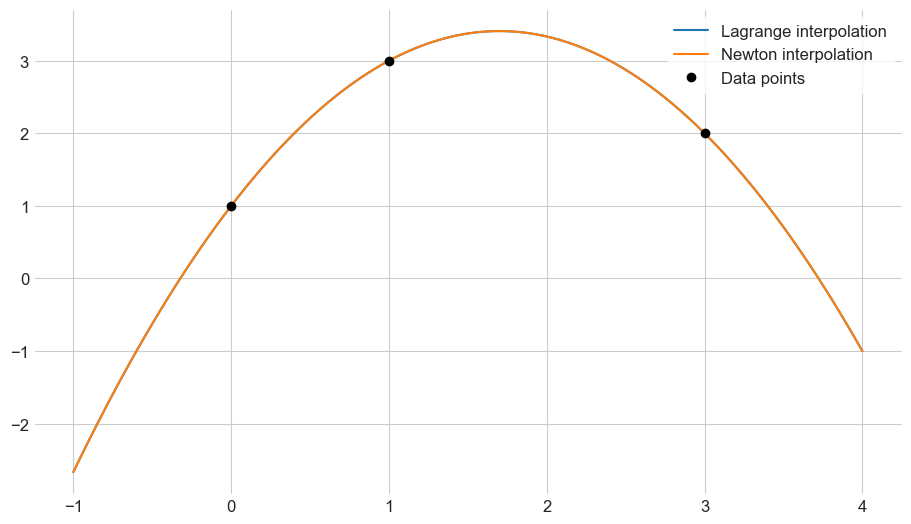

In [43]:
x = [0,1,3]
y = [1,3,2]
PL = LagrangePolynomial(x, y)
PN = NewtonPolynomial(x, y)

t = np.linspace(x[0]-1, x[-1]+1, 100)
plt.plot(t, PL(t), label = "Lagrange interpolation")
plt.plot(t, PN(t), label = "Newton interpolation")
plt.plot(x, y, "ko", label = "Data points")
plt.legend()
plt.show()

### Hermite Interpolation

In [ ]:
def generalDividedDifferences(x, Y):
    n = len(x)
    m = len(Y[0])
    z = np.repeat(Y[0], m)
    dd = np.zeros(n)
    for i in reversed(range(n)):
        for j in range(i,n):
            if i == j:
                dd[i] = z[i]
            elif x[i] == x[j]:
                dd[i] = Y[,i] yvals[j - i + i] / (j-i)!
            coeffs[i] = (coeffs[i] - coeffs[i-1]) / (x[i] - x[i-k])
    return coeffs

## Rational Interpolation
### Inverse Divided Differences


## Trigonometric Interpolation
interpolation of periodic functions


In [ ]:
def fft(fvals):
    N = len(fvals)
    n = 
    m = 
    n = 
    Ff = fvals
    for m in reversed(range(1,n)):
        for k in range(2**(m-1) - 1):
            e = np.exp(-2*np.pi / 2**m)**k
            for r in range(0, 2**(n-1) - 1, 2**m):
                x = Ff[r+k]
                y = Ff[r+k+2**(m-1)]
                Ff[r+k] = x+y
                Ff[r+k+2**(m-1)] = e * (x - y)
                

## Splines
The idea is to interpolate the given function with piecewise functions such that the result is $C^k.$

$\mathcal{S}_m(\{x_0,\dots,x_n\} = \{f\in C^{m-1}[a,b] \ : \ f|_{[x_{i-1},x_i]} \in \mathbb{P}_m\}$ are splines of degree $m.$

Most used are cubic splines $s\in\mathcal{S}_3$ with the additional property that $s''(x_0) = s''(x_n)=0.$ These are called natural cubic splines and they minimize the integral squared curvature.

In [194]:
def naturalCubicSpline(x, y):
    x = np.array(x, dtype = np.double)
    y = np.array(y, dtype = np.double)
    n = len(x)
    
    #constructs system matrix
    h = x[1:] - x[:-1]
    du = np.zeros(n-1)
    du[1:] = h[1:] / (h[1:] + h[:-1])
    dl = np.zeros(n-1)
    dl[:-1] = h[:-1] / (h[1:] + h[:-1])
    d = 2 * np.ones(n)
    A = np.diag(d) + np.diag(du,1) + np.diag(dl,-1)
    
    #constructs system vector
    z = np.zeros(n)
    z[1:-1] = 6 / (h[1:] + h[:-1]) * ((y[2:] - y[1:-1]) / h[1:] - (y[1:-1] - y[:-2]) / h[:-1])
    
    #solves system
    s = GaußAlgorithm(A,z)
    
    #calculates coefficient vectors
    a = (s[1:] - s[:-1]) / h / 6
    b = s[:-1] / 2
    c = (y[1:] - y[:-1]) / h - h * (s[1:] + 2 * s[:-1]) / 6
    d = y[:-1]
    coeffs = np.array([a,b,c,d]).T
    
    #defines each spline
    def Si(t, i):
        z = t - x[i]
        return coeffs[i,0] * z**3 + coeffs[i,1] * z**2 + coeffs[i,2] * z + coeffs[i,3]
    
    #aggregates all splines
    def S(t):
        if isinstance(t, (float, int)):
            for i in range(n):
                if t < x[i]:
                    return Si(t, i-1+(i==0))
            else:
                return Si(t, n-2)
        else:
            return np.array([S(el) for el in t])
    
    return S

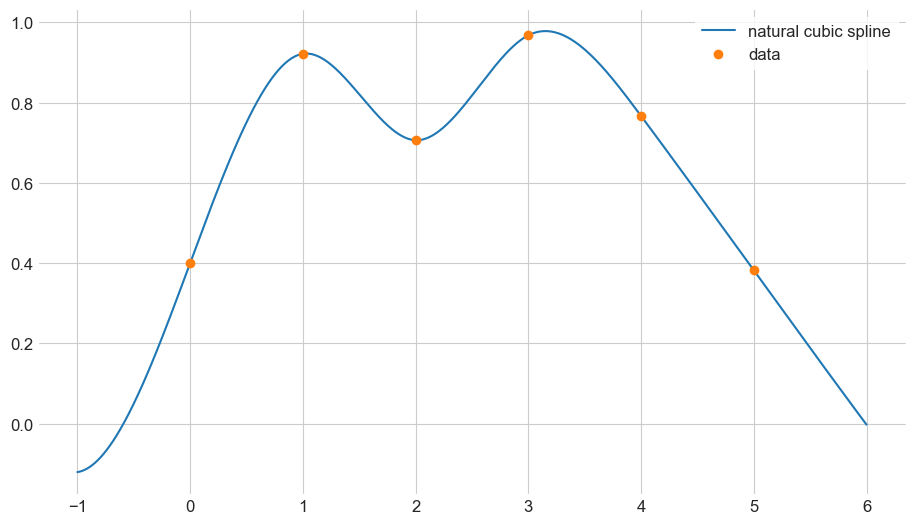

In [207]:
x = [0,1,2,3,4,5]
y = np.random.rand(len(x))
S = naturalCubicSpline(x, y)

t = np.linspace(x[0]-1, x[-1]+1, 1000)
plt.plot(t, S(t), label = "natural cubic spline")
plt.plot(x, y, "o", label = "data")
plt.legend()
plt.show()